# 추천시스템 기초 실습

## 0. 데이터 불러오기 및 탐색

데이터는 movielens에서 제공하는 데이터 중 하나로, 가장 크기가 작은 버전으로 가져왔습니다.
- movies.csv: 영화 제목과 영화 장르에 대한 데이터
- ratings.csv: user(사용자)-movie(아이템) 선호도 데이터
- tags.csv: user가 해당 movie에 부여한 tag 데이터

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from tqdm import tqdm

## 1. Content-based Filtering 실습

content-based filtering은 movie(아이템) 간의 유사도를 계산하여 해당 movie와 유사한 movie를 추천해주는 간단한 추천 알고리즘

제공된 데이터에서 movie의 콘텐츠를 확인할 수 있는 데이터는 movies.csv의 장르와 tags.csv의 태그 정보가 있음

In [2]:
# 아이템 간 유사도 계산을 위한 데이터프레임 만들기
# 열은 영화 장르가 될 수도 있고, 영화 태그가 될 수도 있음 (영화 태그의 경우 모든 영화에 대한 태그는 없음)

In [7]:
movie = pd.read_csv('ml-latest-small/movies.csv')
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [8]:
# TF-IDF를 적용할 수 있지만 여기서는 skip
# TF-IDF를 적용하게 되면 다음과 같이 나오긴 합니당

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
movie['corpus'] = movie['genres'].apply(lambda x : ' '.join(x.split('|')))

In [11]:
movie

,movieId,title,genres,corpus
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy,Comedy
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,Action Animation Comedy Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,Animation Comedy Fantasy
9739,193585,Flint (2017),Drama,Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,Action Animation


In [12]:
tfidv = TfidfVectorizer().fit(movie['corpus'])

In [13]:
temp = pd.DataFrame(tfidv.transform(movie['corpus']).toarray())

In [14]:
temp

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000000,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.726241,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0.436010,0.000000,0.614603,0.000000,0.318581,0.0,0.0,0.000000,0.575034,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9738,0.000000,0.000000,0.682937,0.000000,0.354002,0.0,0.0,0.000000,0.638968,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9739,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9740,0.578606,0.000000,0.815607,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


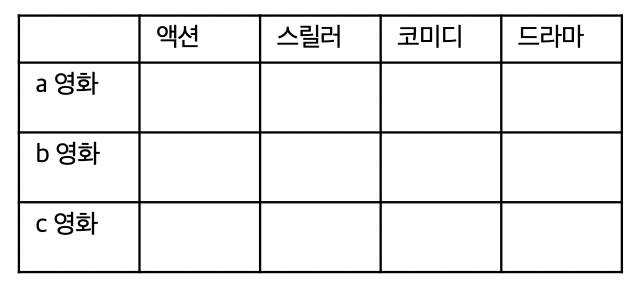

In [15]:
genres = []     # 추출된 장르를 저장할 리스트
for genre in movie['genres'] :
    for g in genre.split('|') :      # | 를 기준으로 여러개의 장르 구분
        genres.append(g)             # 리스트에 추가]
genres_unique = pd.unique(genres)
print('전체 장르 수 : ',len(pd.unique(genres)))   #전체 장르 수 :  20b

전체 장르 수 :  20


In [16]:
genres_unique 

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [17]:
# zero행렬 이용
zero = np.zeros((len(movie),20))   # 행 : 9742, 열 : 20

# zero행렬을 DataFrame으로 변환
dummy = pd.DataFrame(zero, columns = list(genres_unique))

# 더미행렬
for n, g in enumerate(movie.genres):
    dummy.loc[n, g.split("|")]=1 

In [18]:
dummy

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9738,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9739,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9740,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
dummy.index = movie['movieId']

In [20]:
dummy

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
piv = dummy.copy()

In [22]:
# 아이템 간 유사도 구하기
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
# 영화-영화의 유사도를 코사인 유사도를 사용해서 구해줍니당
CBF = cosine_similarity(piv, piv)
CBF = DataFrame(CBF, index=piv.index, columns=piv.index)

In [24]:
# movie - moive 아이템 간 유사도 데이터프레임
CBF

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.774597,0.316228,0.258199,0.447214,0.000000,0.316228,0.632456,0.000000,0.258199,...,0.447214,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
2,0.774597,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816497,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
3,0.316228,0.000000,1.000000,0.816497,0.707107,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.353553,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
4,0.258199,0.000000,0.816497,1.000000,0.577350,0.000000,0.816497,0.000000,0.000000,0.000000,...,0.288675,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
5,0.447214,0.000000,0.707107,0.577350,1.000000,0.000000,0.707107,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.670820,0.288675,0.353553,0.288675,0.500000,0.288675,0.353553,0.000000,0.500000,0.288675,...,0.750000,0.353553,0.353553,0.500000,0.0,1.000000,0.866025,0.00000,0.707107,0.500000
193583,0.774597,0.333333,0.408248,0.333333,0.577350,0.000000,0.408248,0.000000,0.000000,0.000000,...,0.577350,0.408248,0.408248,0.577350,0.0,0.866025,1.000000,0.00000,0.408248,0.577350
193585,0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.707107,0.707107,0.000000,0.0,0.000000,0.000000,1.00000,0.000000,0.000000


In [25]:
movie[movie['movieId'].isin(CBF[193583].sort_values(ascending=False)[:10].index)]

,movieId,title,genres,corpus
3098,4158,Monkeybone (2001),Animation|Comedy|Fantasy,Animation Comedy Fantasy
4558,6773,"Triplets of Belleville, The (Les triplettes de...",Animation|Comedy|Fantasy,Animation Comedy Fantasy
4841,7228,Cool World (1992),Animation|Comedy|Fantasy,Animation Comedy Fantasy
7199,72692,Mickey's Once Upon a Christmas (1999),Animation|Comedy|Fantasy,Animation Comedy Fantasy
7368,79008,South Park: Imaginationland (2008),Animation|Comedy|Fantasy,Animation Comedy Fantasy
7917,95311,Presto (2008),Animation|Children|Comedy|Fantasy,Animation Children Comedy Fantasy
8725,126577,"Daddy, I'm A Zombie (2012)",Animation|Comedy|Fantasy,Animation Comedy Fantasy
8999,139855,Anomalisa (2015),Animation|Comedy|Fantasy,Animation Comedy Fantasy
9665,182297,Porky in Wackyland (1938),Animation|Comedy|Fantasy,Animation Comedy Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,Animation Comedy Fantasy


In [26]:
# 각 영화와 다른 영화와의 유사도가 모두 계산되어 있고, 유사도가 높은 영화가 가장 비슷한 영화라고 할 수 있습니당
# 입력 아이템과 가장 유사한 아이템 TOP10개를 뽑아봅시당
def getCBF(movieId):
    print('입력 영화:{}'.format(movieId))
    print('입력 영화 장르: {}'.format(movie[movie['movieId']==movieId]['genres']))
    return movie[movie['movieId'].isin(CBF[movieId].sort_values(ascending=False)[:10].index)]

In [27]:
getCBF(193583)

입력 영화:193583
입력 영화 장르: 9738    Animation|Comedy|Fantasy
Name: genres, dtype: object


,movieId,title,genres,corpus
3098,4158,Monkeybone (2001),Animation|Comedy|Fantasy,Animation Comedy Fantasy
4558,6773,"Triplets of Belleville, The (Les triplettes de...",Animation|Comedy|Fantasy,Animation Comedy Fantasy
4841,7228,Cool World (1992),Animation|Comedy|Fantasy,Animation Comedy Fantasy
7199,72692,Mickey's Once Upon a Christmas (1999),Animation|Comedy|Fantasy,Animation Comedy Fantasy
7368,79008,South Park: Imaginationland (2008),Animation|Comedy|Fantasy,Animation Comedy Fantasy
7917,95311,Presto (2008),Animation|Children|Comedy|Fantasy,Animation Children Comedy Fantasy
8725,126577,"Daddy, I'm A Zombie (2012)",Animation|Comedy|Fantasy,Animation Comedy Fantasy
8999,139855,Anomalisa (2015),Animation|Comedy|Fantasy,Animation Comedy Fantasy
9665,182297,Porky in Wackyland (1938),Animation|Comedy|Fantasy,Animation Comedy Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,Animation Comedy Fantasy


## 2. Collaborative Filtering 실습

User-based CF를 실습해 봅시당

In [28]:
# User-Item 간 선호도 데이터프레임 만들기

In [29]:
rating = pd.read_csv('ml-latest-small/ratings.csv')
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


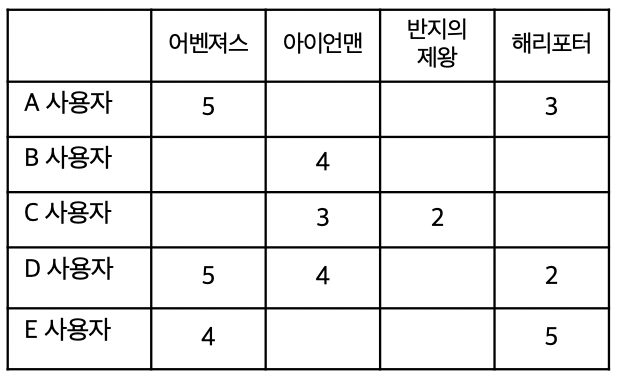

In [30]:
# 해당 데이터프레임은 사용자-영화 선호도 데이터프레임입니당
piv = rating.pivot_table(values='rating', index = 'userId', columns = 'movieId').fillna(0)
piv

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# 사용자 간 유사도 구하기
CF = cosine_similarity(piv, piv)
CF = DataFrame(CF)

In [32]:
# 사용자와 사용자의 유사도를 구할 때 꼭 코사인 유사도를 사용하지 않아도 됩니당
# 보완 코사인 유사도 혹은 피어슨 상관계수를 적용해보아유
CF.index = piv.index
CF.columns = piv.index
CF

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.164191,0.028429,0.012993,0.200395,0.106435,0.102123,0.200035,0.099388,0.075898,0.088963,...,0.178084,0.116534,0.300669,0.066032,0.148141,1.000000,0.153063,0.262558,0.069622,0.201104
607,0.269389,0.012948,0.019247,0.131746,0.152866,0.162182,0.186114,0.185142,0.011844,0.010451,...,0.092525,0.199910,0.203540,0.137834,0.118780,0.153063,1.000000,0.283081,0.149190,0.139114
608,0.291097,0.046211,0.021128,0.149858,0.135535,0.178809,0.323541,0.187233,0.100435,0.077424,...,0.158355,0.197514,0.232771,0.155306,0.178142,0.262558,0.283081,1.000000,0.121993,0.322055


In [45]:
# 입력 사용자와 가장 가까운 유저에서 선호도가 가장 높은 아이템 TOP5를 추천해봅시당!
# 이 때, 입력 사용자가 이미 시청한/평가한 영화는 제외해야하도록 추천 리스트를 만들어봅시당
def getCF(userId):
    print('-----recommendation list-----')
    
    # 가장 가까운 유저(353) 구하기
    most_common_user = CF[userId].sort_values(ascending=False)[1:2].index[0]

    # 가장 가까운 유저의 상위 rating 영화 목록
    all_movie_list = rating[rating['userId']==most_common_user].sort_values(by='rating',ascending=False)['movieId'].tolist()

    final_recommand = []
    for movie_id in all_movie_list:
        if piv.loc[userId, movie_id] == 0: #  비슷한 유저의 상위 영화가 추천해주려는 유저가 본 적이 없다면 추천리스트에 추가
            final_recommand.append(movie_id)
        if len(final_recommand) == 5: # 상위 5개
            break
#     print(final_recommand)
    return movie[movie['movieId'].isin(final_recommand)]

In [46]:
getCF(604)

-----recommendation list-----


,movieId,title,genres,corpus
242,280,Murder in the First (1995),Drama|Thriller,Drama Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,Crime Drama
278,319,Shallow Grave (1994),Comedy|Drama|Thriller,Comedy Drama Thriller
291,333,Tommy Boy (1995),Comedy,Comedy
398,457,"Fugitive, The (1993)",Thriller,Thriller


## 3. Matrix Factorization 실습

같은 폴더에 있는 MF.py의 MatrixFactorization()을 적용해 봅시당

In [47]:
import MF

In [48]:
# 사용자-영화 선호도 데이터프레임입니당
piv.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# MF.py를 참고하여 인자를 입력해 보아유
# :param R: rating matrix
# :param k: latent parameter
# :param learning_rate: alpha on weight update
# :param reg_param: beta on weight update
# :param epochs: training epochs
# :param verbose: print status

R = piv.to_numpy()
factorizer = MF.MatrixFactorization(R, k=10, learning_rate=0.01, reg_param=0.01, epochs=20, verbose=True)
factorizer.fit()
R_reduced = factorizer.print_results()

Iteration: 10 ; cost = 0.0026
Iteration: 20 ; cost = 0.0025
User Latent P:
[[-0.03139154  0.02463696  0.0103361  ...  0.0181933  -0.00400855
   0.0092218 ]
 [ 0.16378825 -0.53127463 -0.31129501 ... -0.41071932  0.33859807
   0.12302586]
 [-0.04338996 -1.35327964 -0.11608414 ... -0.50444962  0.00280188
  -0.082269  ]
 ...
 [-0.07904174  0.0964198   0.01790744 ...  0.06838626 -0.03327566
  -0.12195776]
 [-0.00772519  0.34261069  0.42412075 ...  0.04562282 -0.77394365
  -0.19538273]
 [-0.00466757  0.03279846  0.01802285 ...  0.03187442  0.0328689
   0.0339391 ]]
Item Latent Q:
[[ 0.23626571  0.0943115  -0.13079264 ...  0.91664235  1.230797
   0.28700353]
 [-0.37989268  0.1683224  -0.03334472 ...  0.44988722 -1.23534159
   0.64768929]
 [-0.50445557 -0.16907428  0.18538513 ...  0.42642075  0.80164645
  -0.22351655]
 ...
 [ 0.12415373  0.08854241 -0.50568062 ... -0.07658694 -0.24919595
  -1.98443678]
 [ 0.26459086 -0.00520532  0.06653413 ...  0.64586282  0.3051883
   0.44778498]
 [ 0.0119466

In [54]:
# Matrix Factorizaion으로 찾아낸 잠재요인을 기반으로 재생산한 행렬이네유
pd.DataFrame(R_reduced)

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,4.713707,4.290913,3.901790,3.386741,3.797355,4.769859,3.895154,3.850120,3.769976,4.263304,...,4.245552,4.176149,4.262472,4.361414,3.942060,4.536718,4.322555,3.855224,4.199339,4.325525
1,4.180856,3.653659,3.599589,2.333729,1.765950,3.596440,3.144582,2.474214,1.993636,3.153134,...,3.046531,1.539952,3.828975,1.271045,2.715696,4.266047,3.522934,1.710106,5.766505,5.665146
2,3.171563,0.836327,1.310438,1.729646,1.888252,3.765681,0.378644,1.302414,3.244731,2.399354,...,5.510121,-2.993192,3.247344,2.767743,-4.006853,-1.368048,0.834012,1.562618,3.391005,1.525102
3,3.790887,3.370902,2.979167,1.974284,2.984584,4.076524,2.990114,2.127129,2.971903,3.505847,...,2.705600,3.532195,2.300757,3.872175,3.773620,2.838304,3.271245,3.362159,2.711871,2.011215
4,3.879642,3.634742,2.914779,0.661306,2.907696,4.042000,3.088072,3.621428,4.009998,2.981187,...,2.916447,2.743760,4.720480,2.359973,2.695017,4.425544,2.019927,3.579095,3.927651,3.265424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,3.895761,3.454102,3.212988,2.550482,2.864912,4.003671,3.145050,2.737707,2.950490,3.486495,...,3.501927,3.454564,3.299050,3.689274,3.369503,3.434992,3.443726,3.207534,3.400199,3.308327
606,4.093366,3.680892,3.392172,3.040158,2.854012,4.219801,3.220785,2.835956,3.156244,3.518286,...,3.934467,3.243451,4.101578,3.619179,3.742073,3.412068,3.325734,4.131901,3.741855,3.746886
607,4.029834,3.672123,3.373523,2.666585,3.145759,4.086434,3.330605,3.171142,2.962267,3.637942,...,3.764406,3.895397,3.474773,3.963068,3.338658,3.989694,3.545733,3.295289,3.446505,3.609689
608,2.960776,3.318848,2.809486,2.663783,3.190790,4.126314,3.184911,2.847733,1.770932,3.392917,...,3.176221,5.337911,2.395984,4.141701,4.728847,4.129249,2.948292,1.633769,2.531751,2.463293


## 4. 본인만의 추천 리스트 만들어보기

배운 내용 혹은 알고 있는 추천 알고리즘을 사용해서 user의 다음 추천 아이템에 대한 TOP10 추천 리스트를 만들어 봅시당

코드를 이해할 수 있도록 주석을 꼼꼼하게 달아주시면 감사하겠습니다!

In [37]:
origin_movie = pd.read_csv('ml-latest-small/movies.csv')
movie.head()

,userId,movieId,title,check1,check2
0,1,1,Toy Story (1995),1,1
1,1,3,Grumpier Old Men (1995),1,1
2,1,6,Heat (1995),1,1
3,1,47,Seven (a.k.a. Se7en) (1995),1,1
4,1,50,"Usual Suspects, The (1995)",1,1


In [13]:
origin_rating = pd.read_csv('ml-latest-small/ratings.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [14]:
movie_s = origin_movie[['movieId', 'title']]
rating_s = origin_rating[['userId', 'movieId']]

movie_s['movieId'] = movie_s['movieId'].astype(str)
rating_s['movieId'] = rating_s['movieId'].astype(str)

user_movie_title = pd.merge(rating_s, movie_s, how='left', on='movieId')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
movie = user_movie_title.copy()

In [18]:
# UserId 별 MovidID 구매 목록을 생성 
item_agg = movie.groupby(['title'])['userId'].agg({'nunique'}).reset_index() 
item_agg = item_agg[item_agg['nunique'] >= 5]['title'].values 
user_agg = movie.groupby(['userId'])['title'].agg({'nunique'}).reset_index() 
user_agg = user_agg[user_agg['nunique'] >= 5]['userId'].values

# 전처리 수행 
# 성능향상을 위해 5회 미만 구매된 상품, 5회 미만 구매한 고객은 제외하고 분석진행 
movie['check1'] = 0 
movie.loc[movie['title'].isin(item_agg), 'check1'] = 1 
movie['check2'] = 0 
movie.loc[movie['userId'].isin(user_agg), 'check2'] = 1 
movie = movie.loc[(movie['check1'] == 1) & (movie['check2'] == 1)].reset_index(drop=True)

In [22]:
movie = movie[movie['title'].notnull()].reset_index(drop=True)

agg = movie.groupby(['userId'])['title'].agg({'unique'})
agg.head()

,unique
userId,
1,"[Toy Story (1995), Grumpier Old Men (1995), He..."
2,"[Shawshank Redemption, The (1994), Tommy Boy (..."
3,"[Dangerous Minds (1995), Schindler's List (199..."
4,"[Get Shorty (1995), Twelve Monkeys (a.k.a. 12 ..."
5,"[Toy Story (1995), Get Shorty (1995), Babe (19..."


In [23]:
# int형식은 Word2vec에서 학습이 안되어서 String으로 변경해줍니다. 
sentence = []
for user_sentence in agg['unique'].values:
    sentence.append(list(map(str, user_sentence)))

In [24]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(sentence, min_count = 1, size = 100, window = 5, sg = 1)

In [28]:
w2v_model.wv.most_similar(positive=['Toy Story (1995)'], topn=10)

[('Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 0.9900268316268921),
 ('Jumanji (1995)', 0.9739283919334412),
 ('Babe (1995)', 0.9729292392730713),
 ('Dangerous Minds (1995)', 0.965599775314331),
 ('Casino (1995)', 0.9649226069450378),
 ('GoldenEye (1995)', 0.9644538760185242),
 ('Seven (a.k.a. Se7en) (1995)', 0.9620094895362854),
 ('City of Lost Children, The (Cité des enfants perdus, La) (1995)',
  0.9611153602600098),
 ('Clueless (1995)', 0.9583592414855957),
 ('Dead Man Walking (1995)', 0.9536142945289612)]

In [46]:
# 워드투벡터 모델을 이용해서 최종적인 10개의 추천을 만드는 함수입니다.
def get_w2c_recommandation(uid):

    # 가장 최근에 rating을 높게 준 영화 id
    top_movieid = rating[rating['userId']==uid].sort_values(['timestamp', 'rating'], ascending= (False, False)).iloc[0, 1]
    
    # 그 영화의 title
    top_movietitle = origin_movie[origin_movie['movieId']==top_movieid].iloc[0, 1]
    top_movietitle

    # 그 영화와 비슷한 상위 10개의 영화
    return w2v_model.wv.most_similar(positive=[top_movietitle], topn=10)

get_w2c_recommandation(604)

[('Fatal Instinct (1993)', 0.9977821111679077),
 ('Cowboy Way, The (1994)', 0.9972653985023499),
 ('Dave (1993)', 0.9972507953643799),
 ('With Honors (1994)', 0.997125506401062),
 ('Fearless (1993)', 0.9963662624359131),
 ('Firm, The (1993)', 0.9963366389274597),
 ('Cops and Robbersons (1994)', 0.9959354400634766),
 ('Clean Slate (1994)', 0.9945226907730103),
 ('Getaway, The (1994)', 0.9939367175102234),
 ('Free Willy (1993)', 0.9938713312149048)]

코드 참고: https://www.kaggle.com/chocozzz/00-word2vec-1